# ECE-GY 5373 Lab 7 Multicast (gk1675)

In [1]:
run ../styles.ipynb

Login to hosts and secure copy from hosts  
```shell
# router
ssh gk1675@pc3.instageni.ku.gpeni.net -p 25012
# Romeo
ssh gk1675@pc3.instageni.ku.gpeni.net -p 25011
# Juliet
ssh gk1675@pc1.instageni.ku.gpeni.net -p 25011
# hamlet
ssh gk1675@pc1.instageni.ku.gpeni.net -p 25010
# ophelia
ssh gk1675@pc3.instageni.ku.gpeni.net -p 25010
# secure copy from Romeo
scp -i ~/.ssh/id_rsa -P 25011 gk1675@pc3.instageni.ku.gpeni.net:/users/gk1675/simple-multicast-4-router.pcap .
# secure copy from Router
scp -i ~/.ssh/id_rsa -P 25012 gk1675@pc3.instageni.ku.gpeni.net:/users/gk1675/simple-multicast-5-router.pcap .
```

## Exercise 1

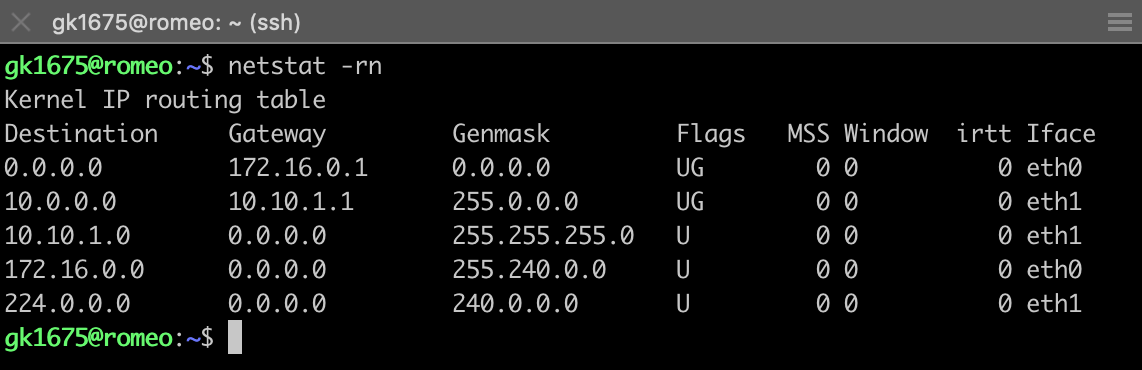

#### Lab report: Submit the routing table you saved. We are planning to send traffic to the 224.0.0.0 multicast subnet over the experiment interface. Will the routing rule we added determine where traffic for this subnet is sent? Explain.

Yes.
The address 224.0.0.0 is a class D IP address used for multicasting. A class D address is specified by first four leading bits as 1110. Therefore, the subnet mask used to filter all class D address is 240.0.0.0 (11110000).  
The purpose of adding this entry to routing table is to involve our host in multicasting. Our host can send multicast traffic to the default router using this routing table entry.

## Exercise 2

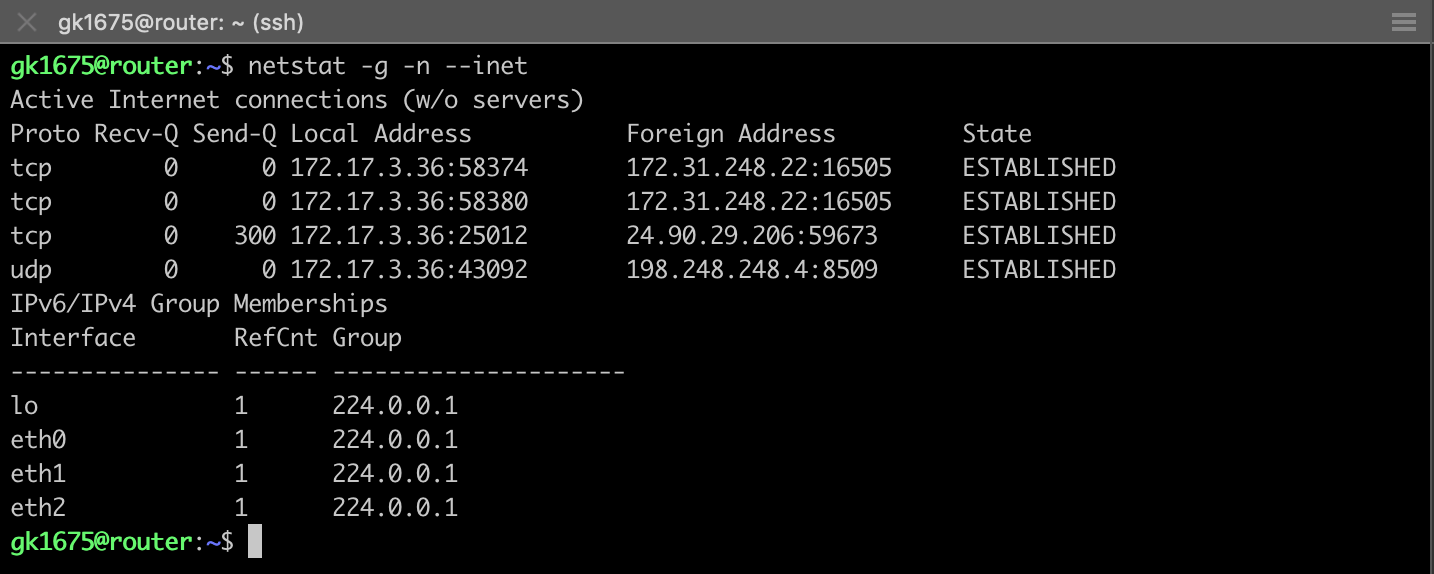

#### Lab report: How many IPv4 multicast groups (those with IP addresses that have four octets) did each interface belong to? What were the groups? Explain the meaning of the group IDs.

| Interface | group_id | meaning |
| --- | --- | --- |
| lo | 224.0.0.1 | multicast in local loopback to different processes in the same host |
| eth0 | 224.0.0.1 | multicast in the same subnet on interface eth0 |
| eth1 | 224.0.0.1 | multicast in the same subnet on interface eth1 |
| eth2 | 224.0.0.1 | multicast in the same subnet on interface eth2 |

## Exercise 3

#### Multicast

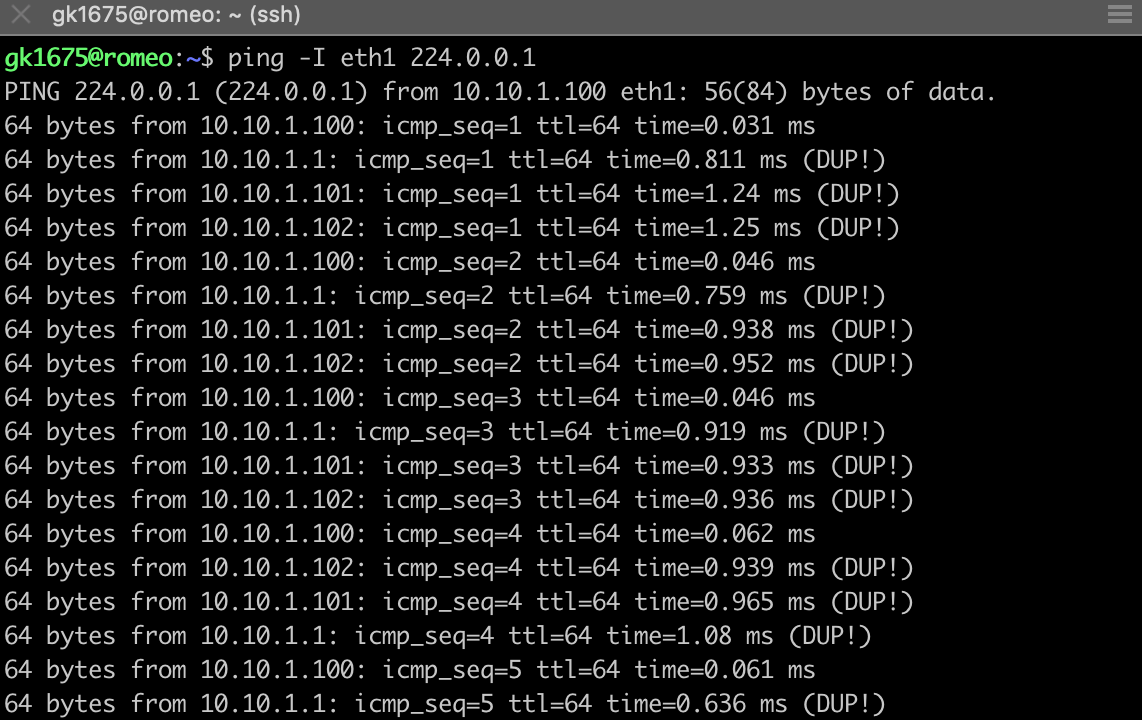

#### Broadcast

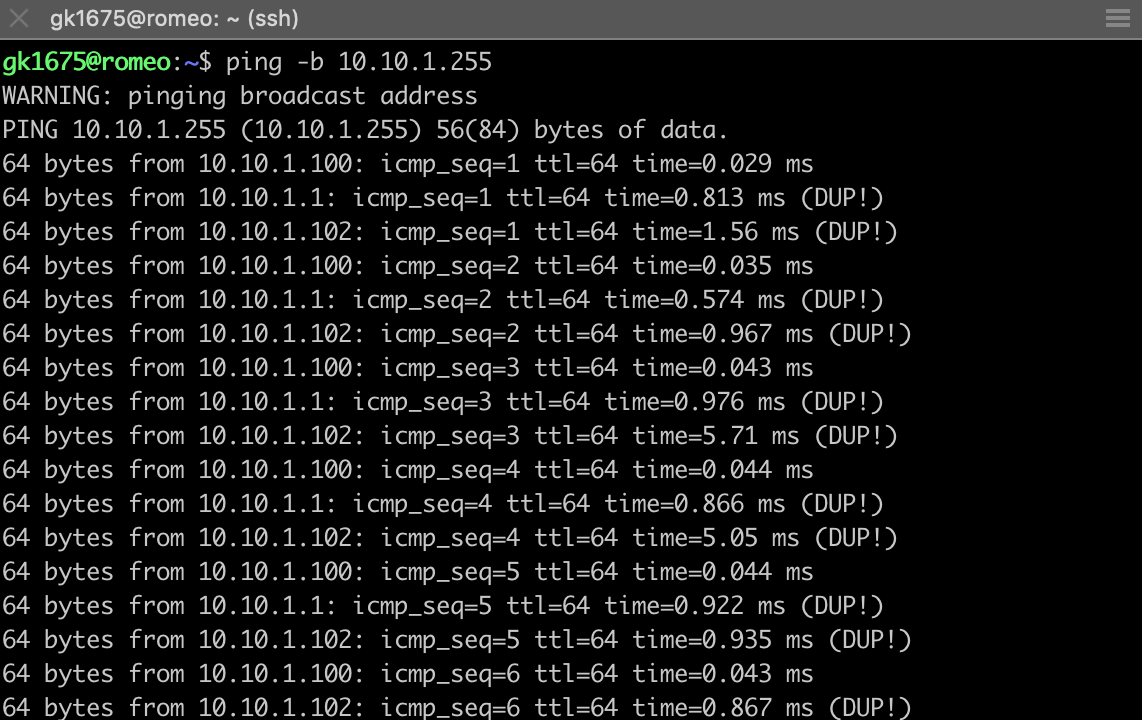

#### Lab report: Which hosts replied when the multicast address was pinged? Explain.

Multicast: 10.10.1.100, 10.10.1.1, 10.10.1.101, 10.10.1.102.  
Broadcast: 10.10.1.100, 10.10.1.1, 10.10.1.102. 

When the multicast address was pinged, all the hosts in this multicast group replied, including Romeo itself. Because they are in the same multicast group.

When the broadcast address was pinged, all the hosts except Juliet in the subnet replied, also includes Romeo itself. Because after changing the netmask, Juliet’s Broadcast address becomes 10.10.255.255, which is not in the same subnet.

The reply from the host on the opposite side of the router was received because of the router, which had forwarded the multicast and broadcast.

## Exercise 4

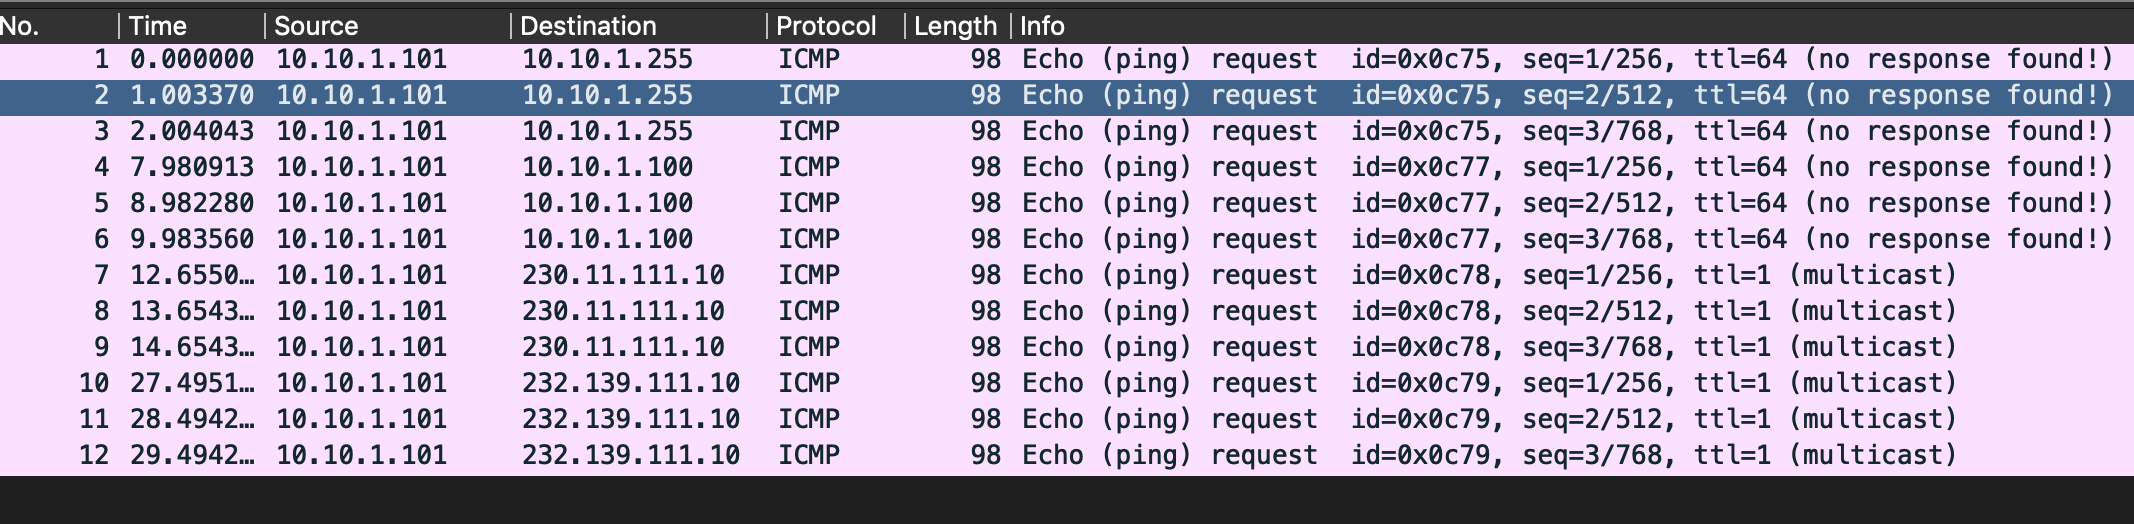

#### Lab report: Compare the source and destination MAC addresses of the frames you captured. Explain how the destination MAC address field is used in each case. Use one of the multicast frames captured to explain how a multicast group address is mapped to a multicast MAC address. 

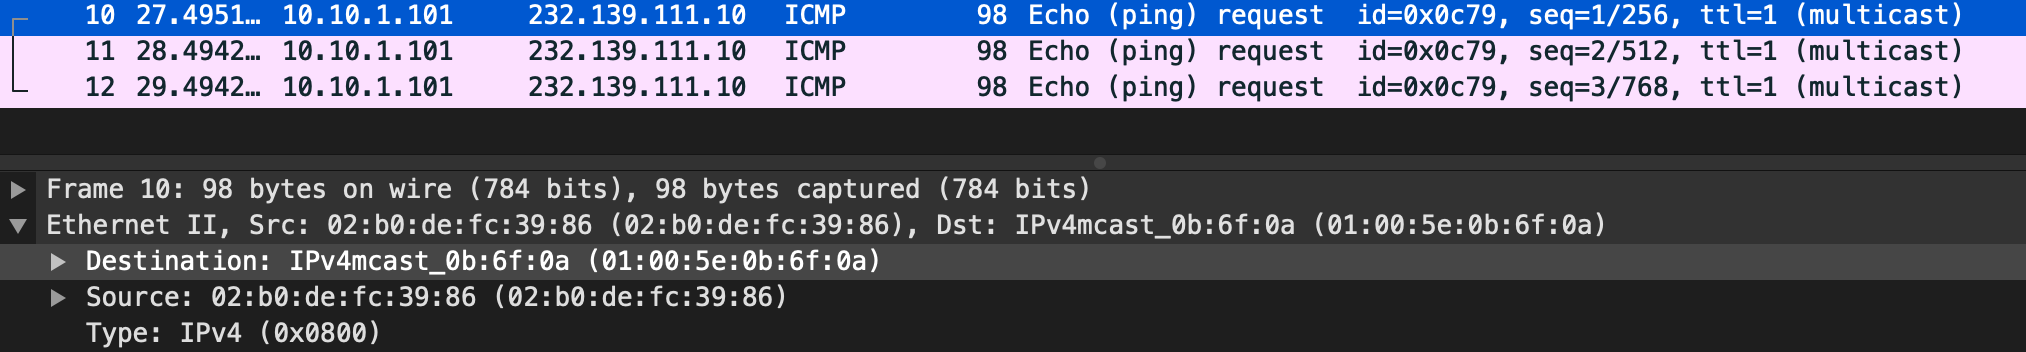

| order | source MAC addresses | destination MAC addresses |
| --- | --- | --- |
| 1 | 02:b0:de:fc:39:86 | ff:ff:ff:ff:ff:ff |
| 2 | 02:b0:de:fc:39:86 | 02:bc:55:3e:30:33 |
| 3 | 02:b0:de:fc:39:86 | 01:00:5e:0b:6f:0a |
| 4 | 02:b0:de:fc:39:86 | 01:00:5e:0b:6f:0a |

A 48-bit long Ethernet address consists of a 23-bit vendor component, a 24-bit group identifier assigned by the vendor, and a multicast bit. The vendor block is a block of Ethernet addresses assigned to a vendor. The multicast bit is used to indicate if the current frame is multicast or unicast. If the multicast bit is set, this Ethernet address is a multicast Ethernet address. 

The Ethernet address segment starting with 0x01-00-5e is used for IP multicasting. When there is a multicast packet to send, the multicast destination IP address is directly mapped to an Ethernet multicast address. No ARP request and reply are needed. Only the last 23 bits of the Class D IP address is mapped into the multicast MAC address.

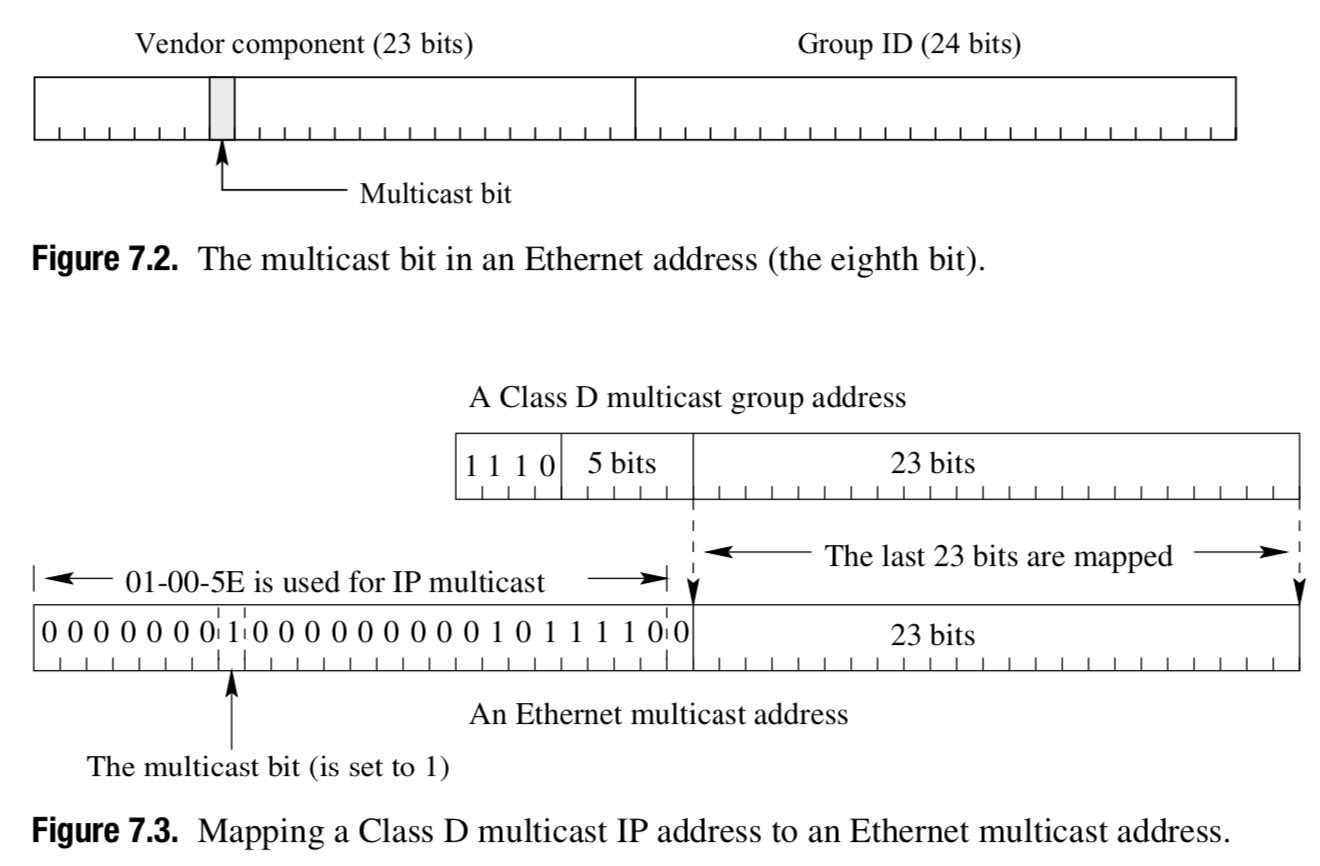

#### For the two multicast frames captured, do they have the same destination MAC address? Why?

Yes, they have the same destination MAC address, because their last 23 bits of their Class D multicast group IP address are the same.

## Exercise 5

#### Lab report: From the tcpdump output, how many messages are sent on the network by iperf? From the output on each of the iperf server hosts, how many copies of each message was received?

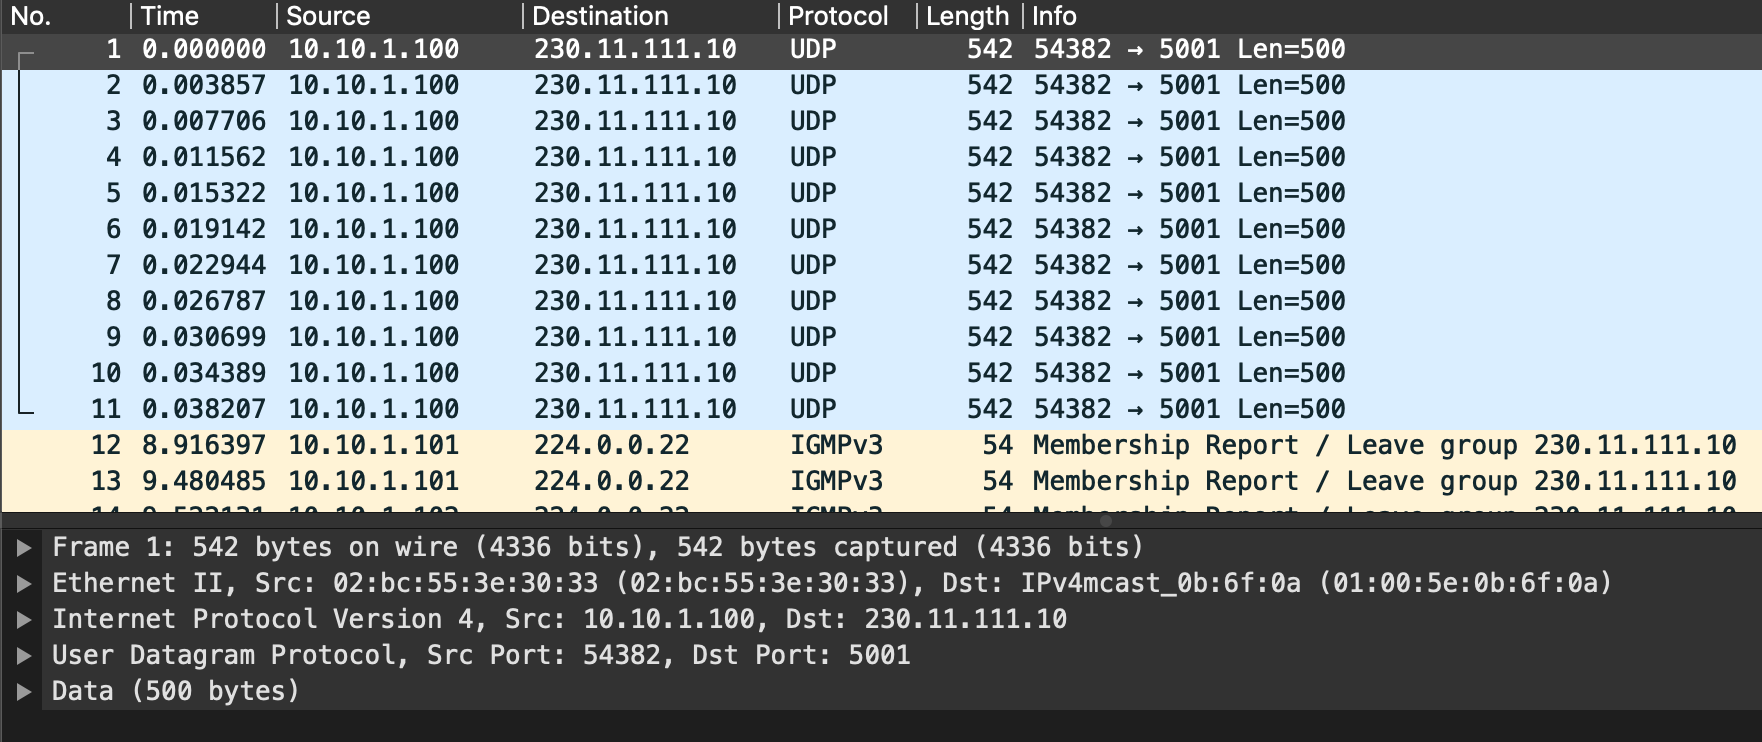

11 mesages were sent on the network by `iperf`. Only 1 copy of each message was received on each of the iperf server hosts, as in the screenshot below.

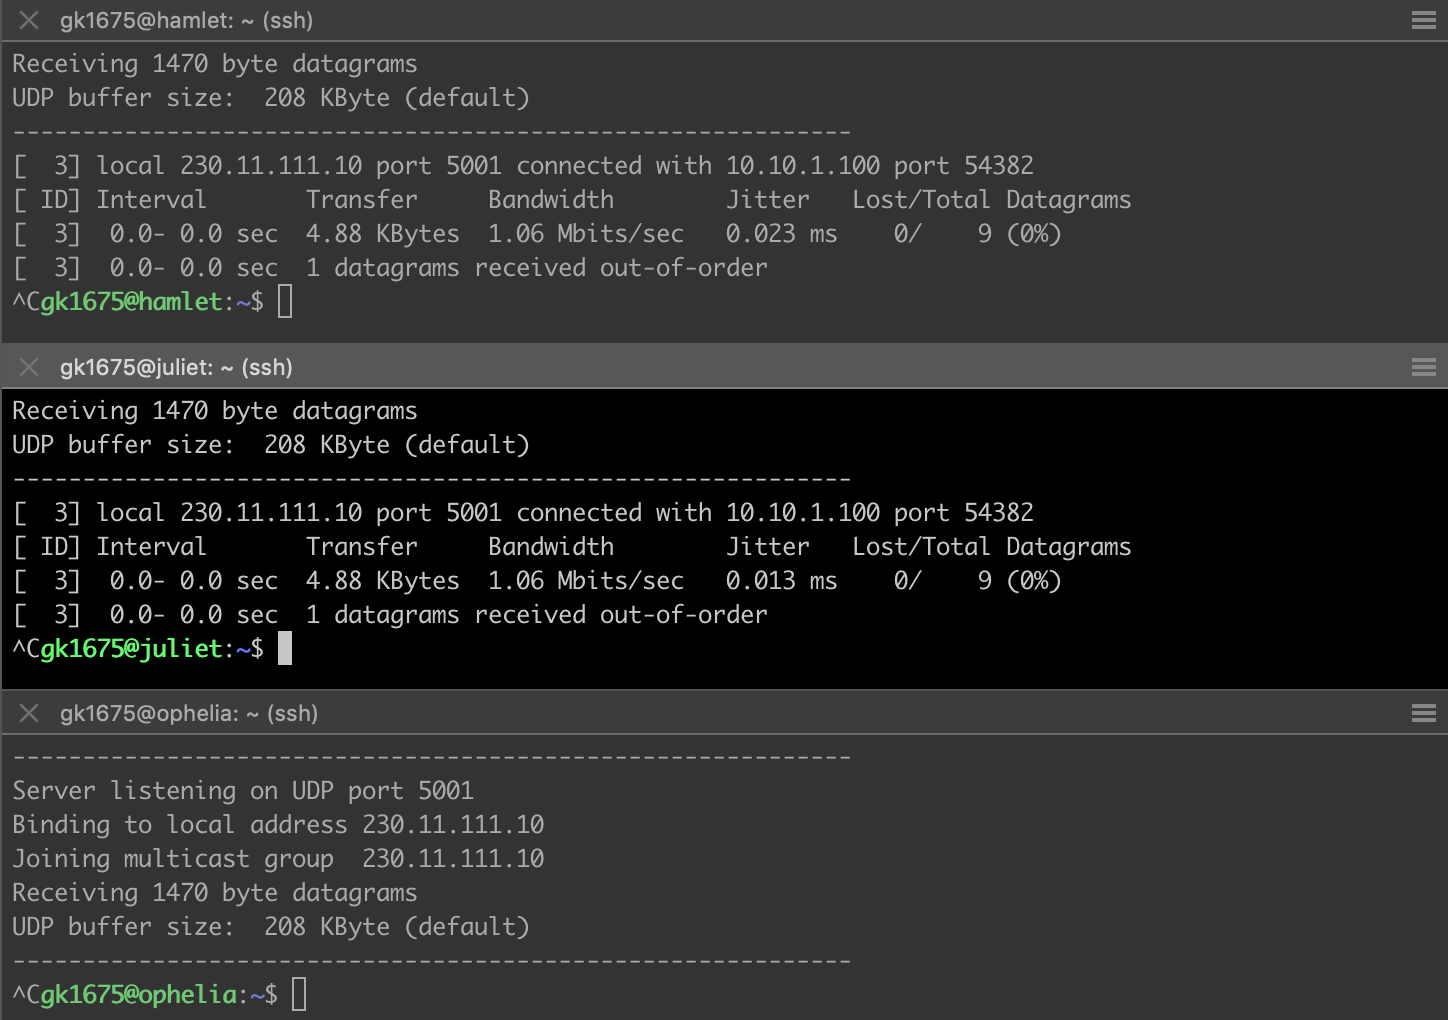

## Exercise 6

#### Lab report: Explain which hosts responded to the ping in each instance, and why. What would you expect each host to have in the output of netstat -g -n, in each case? 

1. With only Juliet running `iperf`

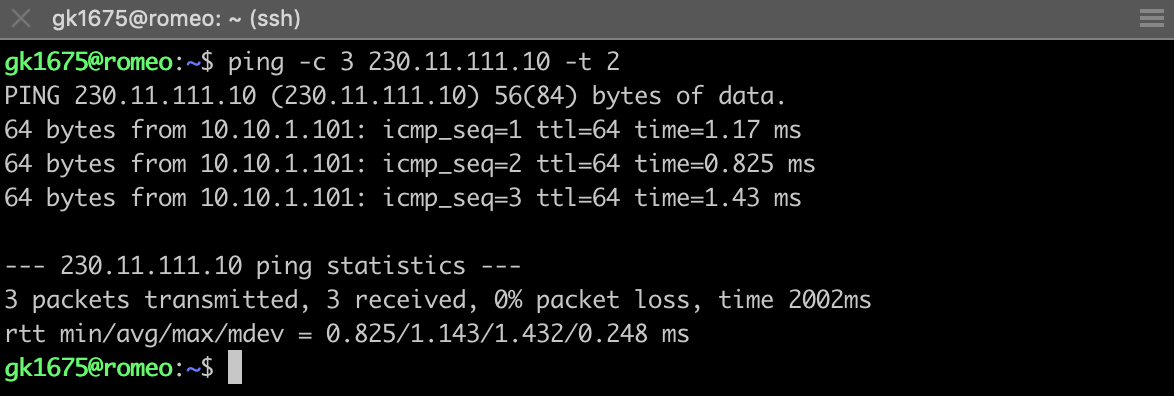

Only juliet (10.10.1.101) responded, because it is the only host that joined the multicast group of 230.11.111.10. The multicast group memberships of Juliet is as below:

|Interface   |    RefCnt | Group |
| --------------- | ------ | --------------------- |
| lo |              1   |   224.0.0.1 |
| eth0      |      1    |  224.0.0.1  | 
| eth1 |            1 |  230.11.111.10 |
| eth1 |            1 |      224.0.0.1 |

The multicast group memberships of other three hosts (romeo, hamlet, ophelia) are:

|Interface   |    RefCnt | Group |
| --------------- | ------ | --------------------- |
| lo |              1   |   224.0.0.1 |
| eth0      |      1    |  224.0.0.1  | 
| eth1 |            1 |      224.0.0.1 |

2. With Juliet and hamlet running `iperf`

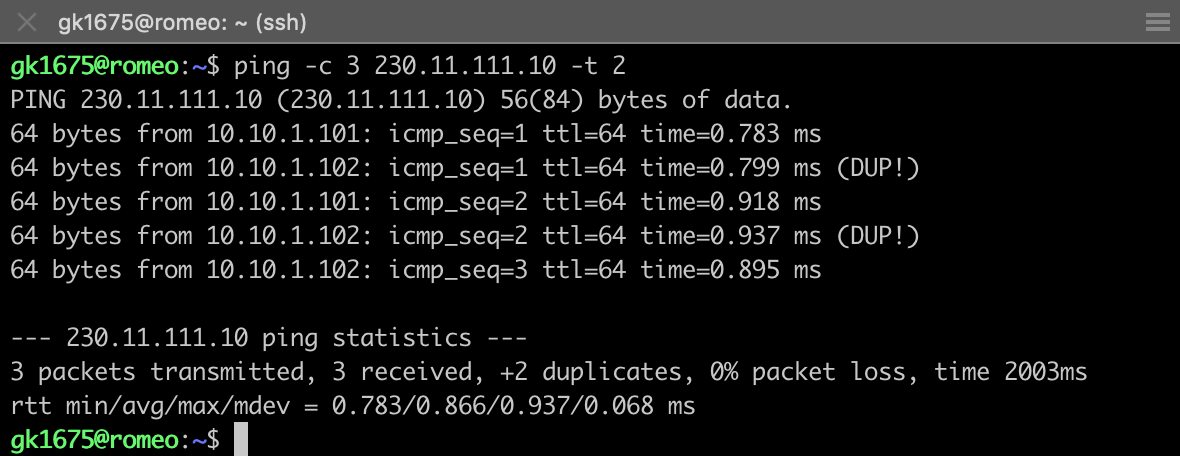

Juliet (10.10.1.101) and hamlet (10.10.1.102) responded, because both of the two host joined the multicast group of 230.11.111.10. The multicast group memberships of Juliet and hamlet is as below:

|Interface   |    RefCnt | Group |
| --------------- | ------ | --------------------- |
| lo |              1   |   224.0.0.1 |
| eth0      |      1    |  224.0.0.1  | 
| eth1 |            1 |  230.11.111.10 |
| eth1 |            1 |      224.0.0.1 |

The multicast group memberships of romeo and ophelia are:

|Interface   |    RefCnt | Group |
| --------------- | ------ | --------------------- |
| lo |              1   |   224.0.0.1 |
| eth0      |      1    |  224.0.0.1  | 
| eth1 |            1 |      224.0.0.1 |

3. With Juliet, ophelia and hamlet running `iperf`

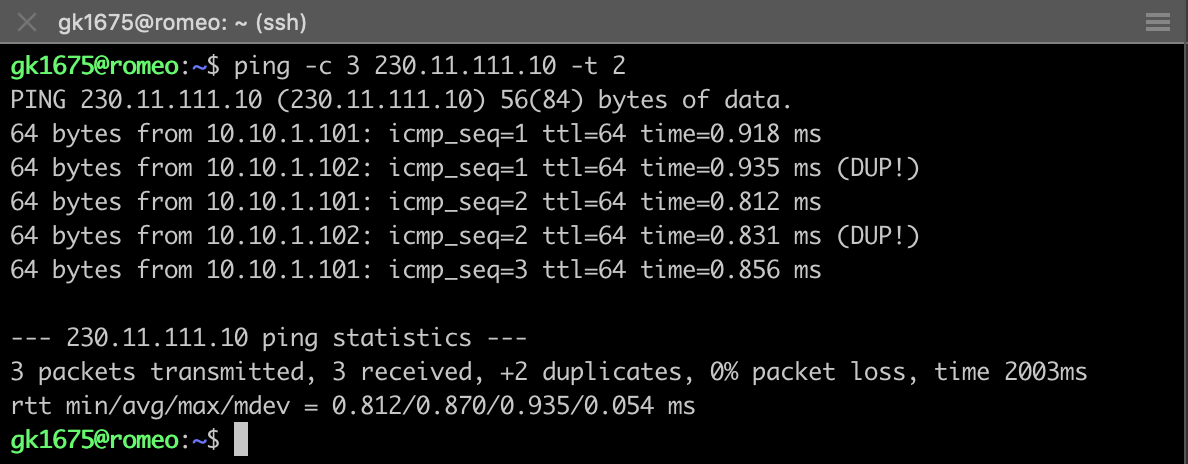

Juliet (10.10.1.101), hamlet (10.10.1.102) and 10.10.1.103(Ophelia) responded, because all of the three host joined the multicast group of 230.11.111.10. The multicast group memberships of Juliet and hamlet is as below:

|Interface   |    RefCnt | Group |
| --------------- | ------ | --------------------- |
| lo |              1   |   224.0.0.1 |
| eth0      |      1    |  224.0.0.1  | 
| eth1 |            1 |  230.11.111.10 |
| eth1 |            1 |      224.0.0.1 |

The multicast group memberships of romeo is:

|Interface   |    RefCnt | Group |
| --------------- | ------ | --------------------- |
| lo |              1   |   224.0.0.1 |
| eth0      |      1    |  224.0.0.1  | 
| eth1 |            1 |      224.0.0.1 |

4. With no other host running `iperf`

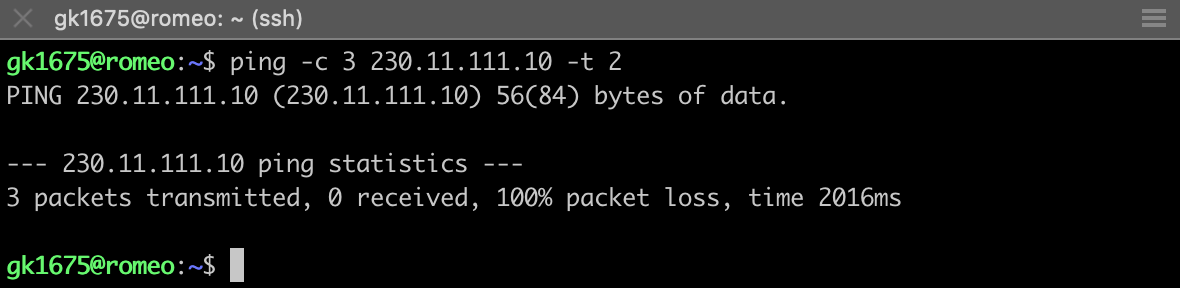

No host responded, since all the other hosts had quitted the multicast group, resulting in all 3 packets lost.

The multicast group memberships all hosts becomes:

|Interface   |    RefCnt | Group |
| --------------- | ------ | --------------------- |
| lo |              1   |   224.0.0.1 |
| eth0      |      1    |  224.0.0.1  | 
| eth1 |            1 |      224.0.0.1 |

#### Compare to the results of Exercise 4. Did "romeo" respond to its own ping requests? Why or why not?

No, romeo did not respond to its own ping in this case, which is different from exercise 4.  
In this exercise, whenever a host joins or leaves a multicast group, it first sends an IGMPv3 message to join or leave a multicast group. Romeo did not join the multicast group in this case, therefore it could not receive the ICMP to the multicast group. 

---
P.S. Resources on GENI deleted.   
The source code of this notebook is committed to [Guandong Kou's GitHub repository](https://github.com/Kou-Guandong/NYU_5373_Internet_Architecture_and_Protocols)